# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [24]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.head(5)

(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'cat_asf'] = "asfixia_grave"
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'cat_asf'] = "asfixia_moderada"
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'cat_asf'] = "asfixia_leve"
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'cat_asf'] = "normal"

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

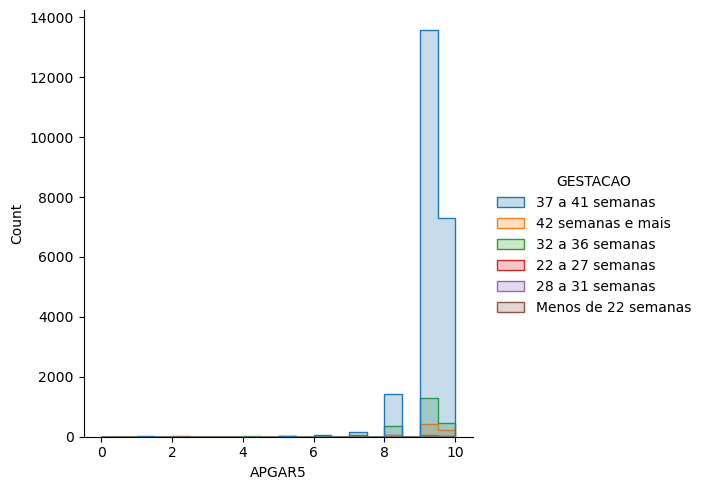

In [17]:
sns.displot(data = sinasc
            ,x = 'APGAR5'
            ,hue = 'GESTACAO'
            ,bins = 20
            ,element = 'step'
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [23]:
sinasc[['APGAR5','GESTACAO']]

,APGAR5,GESTACAO
0,10.0,37 a 41 semanas
1,9.0,37 a 41 semanas
2,10.0,37 a 41 semanas
3,10.0,37 a 41 semanas
4,10.0,37 a 41 semanas
...,...,...
27023,9.0,32 a 36 semanas
27024,9.0,37 a 41 semanas
27025,10.0,37 a 41 semanas
27026,9.0,32 a 36 semanas


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [28]:
sinasc['percent'] = (sinasc['APGAR5'] / 
                     sinasc['APGAR5'].sum()) * 100

sinasc[['APGAR5','GESTACAO', 'percent']]

,APGAR5,GESTACAO,percent
0,10.0,37 a 41 semanas,0.004046
1,9.0,37 a 41 semanas,0.003642
2,10.0,37 a 41 semanas,0.004046
3,10.0,37 a 41 semanas,0.004046
4,10.0,37 a 41 semanas,0.004046
...,...,...,...
27023,9.0,32 a 36 semanas,0.003642
27024,9.0,37 a 41 semanas,0.003642
27025,10.0,37 a 41 semanas,0.004046
27026,9.0,32 a 36 semanas,0.003642


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

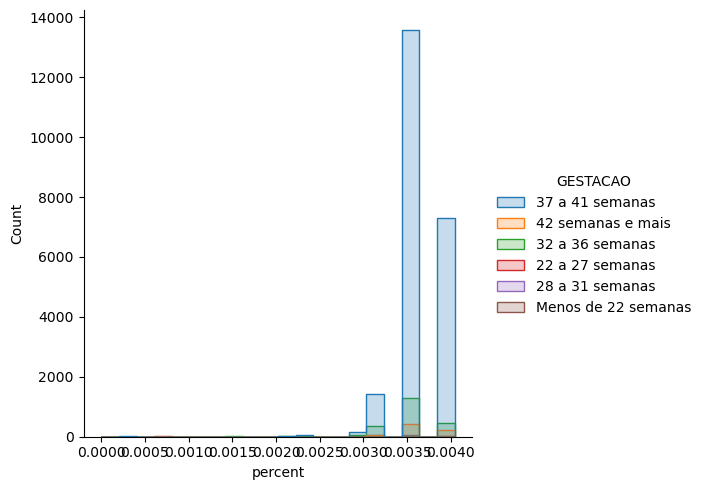

In [31]:
sns.displot(data = sinasc
            ,x = 'percent'
            ,hue = 'GESTACAO'
            ,bins = 20
            ,element = 'step'
           )

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

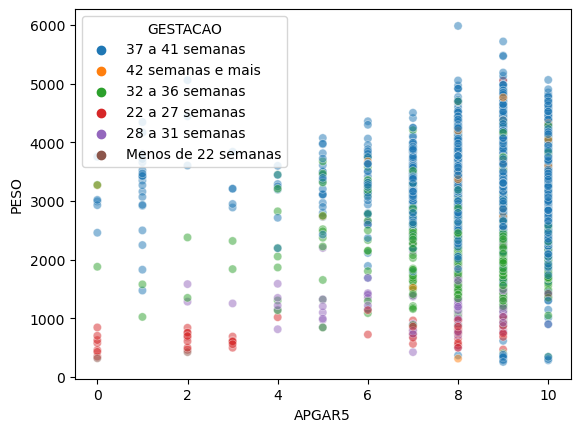

In [33]:
sns.scatterplot(x = 'APGAR5'
                , y = 'PESO'
                , data = sinasc
                , alpha = .5
                , hue = 'GESTACAO'
                )